# Chapter 3

## Question 3.1

The standardized residual $r_i'$ measures the reduction in the RSS (divided by $s^2$) when observation $i$ is omitted from the data. Demonstrate this in R using the `lungcap` data as follows.
* Fit the model `LC.lm` (Example 3.1, p. 97). Compute the RSS, $s^2$ and the standardized residuals from this model.
* Omit Observation 1 from `lungcap`, and refit the model without Observation 1. Call this model `LC.omit1`.
* Compute the difference between the RSS for the full model `LC.lm` and for model `LC.omit1`. Show that this difference divided by $s^2$ is the standardized residuals squared for Observation 1.

Repeat the above process for every observation $i$, and show that the $n$ differences divided by $s^2$ are the standardized residuals squared.

### Answers to 3.1

In [ ]:
install.packages("GLMsData")
library("GLMsData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data("lungcap")
d <- lungcap
d$Smoke <- factor(lungcap$Smoke,
                  levels=c(0,1),
                  labels=c("Non-smoker", "Smoker"))
head(d)

,Age,FEV,Ht,Gender,Smoke
,<int>,<dbl>,<dbl>,<fct>,<fct>
1,3,1.072,46,F,Non-smoker
2,4,0.839,48,F,Non-smoker
3,4,1.102,48,F,Non-smoker
4,4,1.389,48,F,Non-smoker
5,4,1.577,49,F,Non-smoker
6,4,1.418,49,F,Non-smoker


In [ ]:
# Fit the model LC.lm (Example 3.1, p. 97). Compute the RSS,
# s2  and the standardized residuals from this model.

LC.lm <- lm(FEV ~ Ht + Gender + Smoke, data=d)

resid_LC.lm <- resid(LC.lm)
(RSS_LC.lm <- sum(resid_LC.lm^2))
(var1_LC.lm <- RSS_LC.lm / (nrow(d) - length(coefficients(LC.lm))))
(var2_LC.lm <- var(resid_LC.lm))

std.resid_LC.lm  <- rstandard(LC.lm)
(std.RSS_LC.lm <- sum(std.resid_LC.lm^2))
(std.var1_LC.lm <- std.RSS_LC.lm / (nrow(d) - length(coefficients(LC.lm))))
(std.var2_LC.lm <- var(std.resid_LC.lm))

[1] 118.379

[1] 0.1821216

[1] 0.1812849

[1] 654.7783

[1] 1.007351

[1] 1.002723

In [ ]:
# Omit Observation 1 from lungcap, and refit the model without Observation 1.
# Call this model LC.omit1.
d2 <- d[-1,]

LC.omit1 <- lm(FEV ~ Ht + Gender + Smoke, data=d2)

In [ ]:
# Compute the difference between the RSS for the full model LC.lm and for model LC.omit1.
resid_LC.omit1 <- resid(LC.omit1)
RSS_LC.omit1 <- sum(resid_LC.omit1^2)
var1_LC.omit1 <- RSS_LC.omit1 / (nrow(d) - length(coefficients(LC.lm)))
var2_LC.omit1 <- var(resid_LC.omit1)

std.resid_LC.omit1  <- rstandard(LC.omit1)
std.RSS_LC.omit1 <- sum(std.resid_LC.omit1^2)
std.var1_LC.omit1 <- std.RSS_LC.omit1 / (nrow(d) - length(coefficients(LC.lm)))
std.var2_LC.omit1 <- var(std.resid_LC.omit1)

(diff_RSS <- RSS_LC.lm - RSS_LC.omit1)

# Show that this difference divided by  s2  is the standardized residuals squared for Observation 1.
(diff_RSS_div_s2 <- diff_RSS / var1_LC.lm)
(std_resid_sq_obs1 <- std.resid_LC.lm[1]^2)

[1] 0.2221247

[1] 1.219651

1 
1.219651

If it's not clear why this relationship should exist, consider that

$$r_i'^2 \approx \frac{\text{RSS}_{\text{full}} - \text{RSS}_{\text{omit i}}}{s^2}$$

In [ ]:
# Repeat the above process for every observation  i ,
# and show that the  n  differences divided by  s2  are the standardized residuals squared.

LC.lm <- lm(FEV ~ Ht + Gender + Smoke, data = d)

resid_LC.lm <- resid(LC.lm)
RSS_LC.lm <- sum(resid_LC.lm^2)
s2 <- RSS_LC.lm / (nrow(d) - length(coefficients(LC.lm)))

std.resid_LC.lm <- rstandard(LC.lm)

rss_diff <- numeric(nrow(d))
for (i in 1:nrow(d)) {
  # Omit the ith observation and refit the model
  d_omit <- d[-i, ]
  LC.omit <- lm(FEV ~ Ht + Gender + Smoke, data = d_omit)

  # Calculate RSS for the model without the ith observation
  resid_LC.omit <- resid(LC.omit)
  RSS_LC.omit <- sum(resid_LC.omit^2)

  # Calculate the difference in RSS
  rss_diff[i] <- RSS_LC.lm - RSS_LC.omit
}

rss_diff_div_s2 <- rss_diff / s2

comparison <- data.frame(
  RSS_Diff_Div_s2 = rss_diff_div_s2,
  Standardized_Residuals_Squared = std.resid_LC.lm^2
)

comparison

,RSS_Diff_Div_s2,Standardized_Residuals_Squared
,<dbl>,<dbl>
1,1.219650738,1.219650738
2,0.003244245,0.003244245
3,0.316473132,0.316473132
4,1.534157462,1.534157462
5,1.891029009,1.891029009
6,1.001661528,1.001661528
7,1.103400211,1.103400211
8,1.546200917,1.546200917
9,0.918635926,0.918635926


## Question 3.2

Consider the hat matrix $H$ as defined in (3.3) (p. 101).

1. Show that $H$ is idempotent; that is, $H^2 = H$.
2. Show that $H$ is symmetric; that is, $H^T = H$.
3. Show $I_n − H$ is idempotent and symmetric.

### Answers to 3.2, 1

***Show that $H$ is idempotent; that is, $H^2 = H$.***

Although the question implies it, recall that the definition of an "idempotent" matrix is that we can multiply it by itself and get the same matrix.  For example, $1$ is idempotent under multiplication because $1 \times 1 = 1$.  Similarly for the identity matrix

$$
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix} \times
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix} =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\rightarrow I \times I = I^2 = I \\
$$

Here, we're asked to check if $H = X_w(X_w^T X_w)^{-1} X^T$ is idempotent.

$$\begin{aligned}
H \times H &= X(X^T X)^{-1} X^T \times X(X^T X)^{-1} X^T \\
&= X(X^T X)^{-1} (X^T X) (X^T X)^{-1} X^T \\
&= X(X^T X)^{-1} I X^T \\
&= X(X^T X)^{-1} X^T \\
&= H \\
\end{aligned}$$

### Answer to 3.2, 2

***Show that $H$ is symmetric; that is, $H^T = H$.***

Again implied by the question, a "symmetric" matrix means that we can transpose the matrix and get the same matrix.  For example

$$
\begin{bmatrix}
a & b \\
b & c \\
\end{bmatrix} ^T =
\begin{bmatrix}
a & b \\
b & c \\
\end{bmatrix}
$$

What about $H$?

$$H = X (X^T X)^{-1} X^T$$
$$\rightarrow H^T = (X (X^T X)^{-1} X^T)^T$$

By the transpose properties
* $(AB)^T = B^T A^T$,
* $(A^T)^T = A$, and
* $((A^T A)^{-1})^T = (A^T A)^{-1}$

we get

$$\begin{aligned}
H^T &= (X^T)^T ((X^T X)^{-1})^T (X)^T \ \text{(first property)}\\
&= X (X^T X)^{-1} X^T \ \text{(second and third properties)} \\
&= H \\
\end{aligned}$$

### Answer to 3.2, 3

***Show $I_n − H$ is idempotent and symmetric.***

Here, $I_n$ denotes an identity matrix that is the same dimension as $H$.

Showing idempotency,

$$\begin{aligned}
(I-H) \times (I-H) &= II - IH - HI + HH \\
&= I - 2H + HH \\
&= I - 2H + H \ \text{(since HH=H by part 1)} \\
&= I - H \\
\end{aligned}$$

Showing symmetry:

$$\begin{aligned}
(I-H)^T &= I^T - H^T \\
& = I - H \ \text{(both I and H symmetric)} \\
\end{aligned}$$

## Question 3.3

Consider a simple linear regression model, with all prior weights set to one and including a constant term in the linear predictor.

1. Show that

$$h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{j=1}^{n}(x_j - \bar{x})^2}$$

2. Use this expression to show that $h_i \ge (1/n)$.
3. Show that $h_i \le 1$.  HINT: Since $H$ is idempotent (Problem 3.2), first show $h_i = \sum_{j=1}^{n} h_{ij}^2 = h_i^2 + \sum_{j \not = i} h_{ij}^2$.

#### Answers

To start, recall the hat matrix $H$.

$$H = X^T (X^T X)^{-1} X$$

This yields an $n \times n$ matrix.  The diagonal elements of $H$, $h_{ii} = h_i$, are the "leverages"--the amount of influence a given datapoint has in determining its predicted value.  We can find $h_i$ as

$$h_i = \vec{x}_{.i}^T (X^T X)^{-1} \vec{x}_{.i}$$


where $\vec{x}_{.i}$ is the meant to be the vector $\vec{x}_{.i} = [1 \ x_i]^T$, with $1$ representing the intercept and $x_i$ the value of $x$ for case $i$.

#### Answer to 3.3, 1

$$\begin{aligned}
h_i &= \begin{bmatrix} 1 & x_i \end{bmatrix}
\left(
\begin{bmatrix}
n & \vec{1}^T X \\
X^T \vec{1} & X^T X \\
\end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 \\
x_i \end{bmatrix} \\
&\text{for } p'=2 \\
&= \begin{bmatrix} 1 & x_i \end{bmatrix}
\left(
\begin{bmatrix}
n & \sum_j x_j \\
\sum_j x_j & \sum_j x_j^2 \\
\end{bmatrix}
\right) ^{-1}
\begin{bmatrix} 1 \\
x_i \end{bmatrix} \\
&= \begin{bmatrix} 1 & x_i \end{bmatrix}
\left(
\frac{1}{n \sum_j x_j^2 - (\sum_j x_j)^2}
\begin{bmatrix}
\sum_j x_j^2 & -\sum_j x_j \\
-\sum_j x_j & n \\
\end{bmatrix}
\right)
\begin{bmatrix} 1 \\
x_i \end{bmatrix} \\
&= \frac{1}{n \sum_j x_j^2 - (\sum_j x_j)^2}
\left(
\begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix}
\sum_j x_j^2 & -\sum_j x_j \\
-\sum_j x_j & n \\
\end{bmatrix}
\begin{bmatrix} 1 \\
x_i \end{bmatrix}
\right) \\
&= \frac{1}{n \sum_j (x_j - \bar{x})^2}
\left(
\sum_j x_j^2 - 2 x_i \sum_j x_j + n x_i^2
\right) \\
&\text{Since } \sum_j x_j = n \bar{x} \text{ and } \sum_j x_j^2 = n \bar{x}^2 + \sum_j (x_j - \bar{x})^2 \\
&= \frac{1}{n \sum_j (x_j - \bar{x})^2}
\left(
n \bar{x}^2 + \sum_j (x_j - \bar{x})^2 - 2 n x_i \bar{x} + n x_i^2
\right) \\
&=  \frac{1}{n \sum_j (x_j - \bar{x})^2}
\left(
n(\bar{x}^2 - 2 x_i \bar{x} + x_i^2) + \sum_j (x_j - \bar{x})^2
\right) \\
&= \frac{n(x_i - \bar{x})^2}{n \sum_j (x_j - \bar{x})^2} +
\frac{\sum_j (x_j - \bar{x})^2}{n \sum_j (x_j - \bar{x})^2} \\
&= \frac{(x_i - \bar{x})^2}{\sum_j (x_j - \bar{x})^2} + \frac{1}{n} \\
&= \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_j (x_j - \bar{x})^2} \\
\end{aligned}$$

#### Answer to 3.3, 2

***Use this expression to show that $h_i \ge (1/n)$.***

From our expression, we see that $h_i$ is $\frac{1}{n}$ PLUS A NON-NEGATIVE TERM (we know it's non-negative because the terms are squared), so it must follow that $h_i \ge \frac{1}{n}$.

#### Answer to 3.3, 3

***Show that $h_i \le 1$.  HINT: Since $H$ is idempotent (Problem 3.2), first show $h_i = \sum_{j=1}^{n} h_{ij}^2 = h_i^2 + \sum_{j \not = i} h_{ij}^2$.***

Recall that $H$ is idempotent because $H^2 = H$.  This implies for each element in $H$, $h_{ij}$, that

$$h_{ij} = \sum_{k=1}^n h_{ik} h_{kj}$$

For the diagonal elements, $h_i$, this can be expanded to

$$h_i = h_i^2 + \sum_{j \not = i} h_{ij}^2$$

I think the best way to show this is with a simple example.

$$\begin{bmatrix}
h_{11} & h_{12} \\
h_{21} & h_{22}
\end{bmatrix}
\begin{bmatrix}
h_{11} & h_{12} \\
h_{21} & h_{22}
\end{bmatrix}
=\begin{bmatrix}
h_{11}^2 + h_{12} h_{21} & h_{11} h_{12} + h_{12} h_{22} \\
h_{11} h_{21} + h_{21} h_{22} & h_{12} h_{21} + h_{22}^2 \\
\end{bmatrix}$$

Since $H$ is symmetric, we can relabel this like

$$\begin{bmatrix}
h_{11}^2 + h_{12}^2 & h_{11} h_{12} + h_{12} h_{22} \\
h_{11} h_{21} + h_{21} h_{22} & h_{22}^2 +h_{21}^2 \\
\end{bmatrix}$$

Notice that the diagonal terms, $h_i$, indeed follow $h_i = h_i^2 + \sum_{j \not = i} h_{ij}^2$.

Since both $h_i^2$ and $\sum_{j \not = i} h_{ij}^2$ are necessarily positive and yet sum to $h_i$, we know that $h_i \ge h_i^2$.  The only way for a positive value $v$ to get *smaller* when squaring is if $v < 1$.  Hence, we conclude that $h_i \le 1$.

## Question 3.4

Equation (3.6)

$$D = \frac{(r')^2}{p'} \frac{h}{1-h}$$

(p. 110) gives an expression for Cook's distance, which can also be written as

$$D_i = \frac{(\boldsymbol{\hat{\mu}} - \boldsymbol{\hat{\mu}}_{(i)})^T (\boldsymbol{\hat{\mu}} - \boldsymbol{\hat{\mu}}_{(i)})}{p' s^2}$$

Interpret Cook's distance using this form.

### Answer to 3.4

Recall that Cook's distance measures a single observation's influence over the fitted values.

Here, that influence is evident in the numerator.  Note that $\boldsymbol{\hat{\mu}}$ is the vector of all fitted values that were fitted with the complete data set, while $\boldsymbol{\hat{\mu}}_{(i)}$ is the the vector of all fitted values that were fitted **without** observation $i$.  So the numerator is the squared distance between these estimates.  When an observation is omitted, these two fits will differ by some distance; the more influential a single observation is in determining the total-data fit, the greater this distance will be (since omitting it omits a major influence of the total-data fit).  

The denominator *normalizes* this squared distance based on the number of parameters ($p'$) and residual variance ($s^2$).  In this way, more parameters or greater variance diminishes the estimated influence of an observation.  This should make sense because greater variance implies unaccounted influences in the data, which necessarily diminishes the influence of any/all observations, and this diminishment should be exacerbated by increased parameters since more parameters decreases variance (i.e., if there is still high variance with many parameters, we should further decrease the estimated influence of any/all observations).

## Question 3.5

To gain experience reading Q–Q plots, use `R` to produce Q–Q plots of data known to be generated randomly from a standard normal distribution using `rnorm()`. Generate ten Q–Q plots based on 100 random numbers, and comment on using Q–Q plots when `n = 100`. Repeat the exercise for `n = 50`, `n = 20` and `n = 10`, and comment further.

### Answer to 3.5

Instead of generating 10 x 4 = 40 plots, let's make some code that produces one plot for each `n` value, then run it several times.

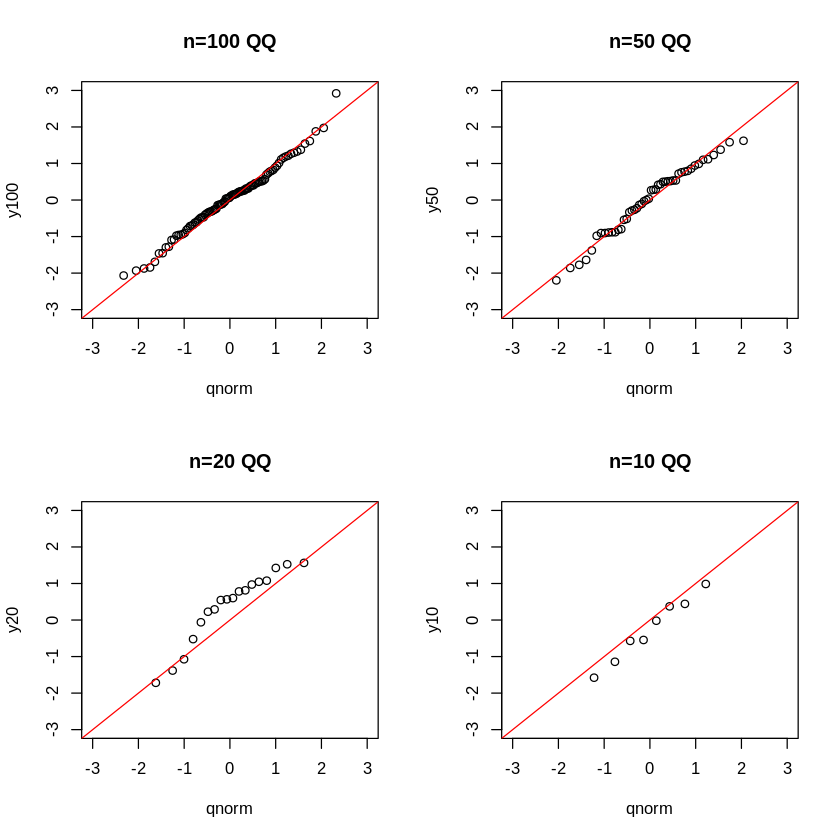

In [ ]:
y100 <- sort(rnorm(n=100))
y50 <- sort(rnorm(n=50))
y20 <- sort(rnorm(n=20))
y10 <- sort(rnorm(n=10))

par(mfrow=c(2,2))
plot((y100) ~ qnorm(seq(from=0, to=1, length=length(y100))),
     ylab="y100", xlab="qnorm", main="n=100 QQ",
     xlim=c(-3,3), ylim=c(-3,3))
     abline(0,1,col="red")
plot((y50) ~ qnorm(seq(from=0, to=1, length=length(y50))),
     ylab="y50", xlab="qnorm", main="n=50 QQ",
     xlim=c(-3,3), ylim=c(-3,3))
     abline(0,1,col="red")
plot((y20) ~ qnorm(seq(from=0, to=1, length=length(y20))),
     ylab="y20", xlab="qnorm", main="n=20 QQ",
     xlim=c(-3,3), ylim=c(-3,3))
     abline(0,1,col="red")
plot((y10) ~ qnorm(seq(from=0, to=1, length=length(y10))),
     ylab="y10", xlab="qnorm", main="n=10 QQ",
     xlim=c(-3,3), ylim=c(-3,3))
     abline(0,1,col="red")

Running this several times, I see a couple of trends.

1. As `n` increases, the range of values increases.
2. It looks like, as `n` decreases, the **average** distance between the data and the theoretical qq-line increases.  Let's check this.

In [ ]:
mean(abs(y100[-c(1, 100)] - qnorm(seq(from=0, to=1, length=length(y100)))[-c(1, 100)]))
mean(abs(y50[-c(1, 50)] - qnorm(seq(from=0, to=1, length=length(y50)))[-c(1, 50)]))
mean(abs(y20[-c(1, 20)] - qnorm(seq(from=0, to=1, length=length(y20)))[-c(1, 20)]))
mean(abs(y10[-c(1, 10)] - qnorm(seq(from=0, to=1, length=length(y10)))[-c(1, 10)]))

[1] 0.1021902

[1] 0.1192546

[1] 0.4107994

[1] 0.2565864

## Question 3.6

Show that the partial residual plot for a simple linear regression model is simply a plot $y$ against $x$.

### Answer to 3.6

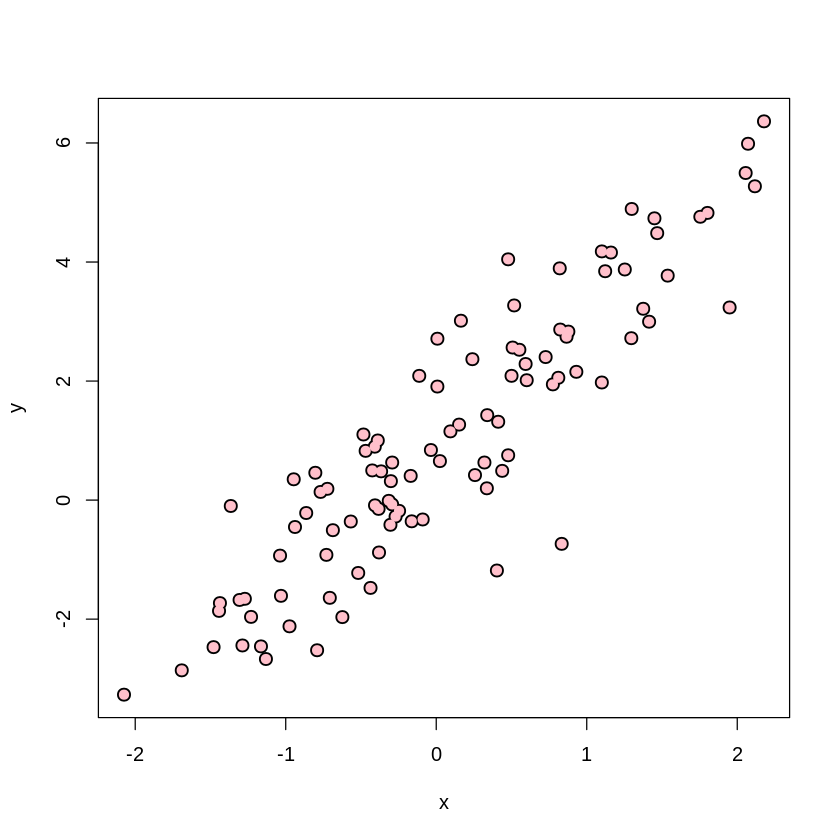

In [ ]:
N <- 100
x <- rnorm(n=N)
y <- rnorm(n=N, mean= (1 + 2*x), sd=1)

m <- lm(y~x)
r_part <- (coef(m)[[1]] + coef(m)[[2]]*x) + residuals(m)

plot(y ~ x, cex=1, lwd=4)
points(r_part ~ x, pch=19, col="pink")

## Question 3.7

For the naval hospital data (data set: `nhospital`) (Example 3.18, p. 136), fit the three models that contain two of the explanatory variables. Show that the fitted values are very similar for all three models.

### Answer to 3.7

Let's get a look at the data?

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(nhospital)
d <- nhospital
head(d)

,Cases,Eligible,OpRooms,MainHours
,<int>,<dbl>,<int>,<dbl>
1,89,25.5,4,304.37
2,513,294.3,11,2616.32
3,231,83.7,4,1139.12
4,68,30.7,2,285.43
5,319,129.8,6,1413.77
6,276,180.8,6,1555.68


Based on p. 137, I think we're meant to use `MainHours` as the outcome variable.

In [ ]:
m1 <- lm(MainHours ~ Cases*Eligible, data=d)
m2 <- lm(MainHours ~ Cases*OpRooms, data=d)
m3 <- lm(MainHours ~ Eligible*OpRooms, data=d)

Now let's show the predictions of each model.

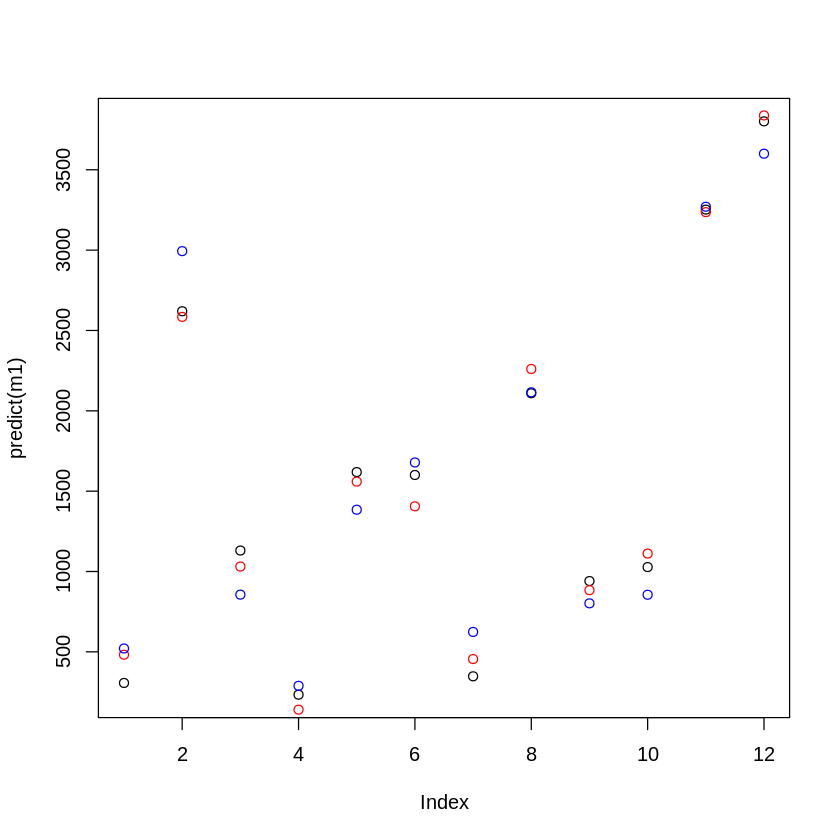

In [ ]:
plot(predict(m1))
points(predict(m2), col="red")
points(predict(m3), col="blue")

Indeed, pretty close.  Why?  This is because, as demonstrated in the text, the three explanatory variables are highly correlated; the infomation contained in any variable is highly duplicated by the other two.

## Question 3.8

The lung capacity data [21] in Example 1.1 (data set: `lungcap`) have been used often in Chaps. 2 and 3.

1. Fit the model with `FEV` as the response and smoking status as the only explanatory variable. Interpret the meaning of the coefficient for smoking.
2. Fit the model with `FEV` as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.
3. Fit the model with the logarithm of `FEV` as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.
4. Determine a suitable model for the data.

### Answer to 3.8, 1

***Fit the model with `FEV` as the response and smoking status as the only explanatory variable. Interpret the meaning of the coefficient for smoking.***

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(lungcap)
d <- lungcap
head(d)

,Age,FEV,Ht,Gender,Smoke
,<int>,<dbl>,<dbl>,<fct>,<int>
1,3,1.072,46,F,0
2,4,0.839,48,F,0
3,4,1.102,48,F,0
4,4,1.389,48,F,0
5,4,1.577,49,F,0
6,4,1.418,49,F,0


In [ ]:
m1 <- lm(FEV ~ Smoke, data=d)
summary(m1)


Call:
lm(formula = FEV ~ Smoke, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7751 -0.6339 -0.1021  0.4804  3.2269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.56614    0.03466  74.037  < 2e-16 ***
Smoke        0.71072    0.10994   6.464 1.99e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8412 on 652 degrees of freedom
Multiple R-squared:  0.06023,	Adjusted R-squared:  0.05879 
F-statistic: 41.79 on 1 and 652 DF,  p-value: 1.993e-10


FEV increases by an average of $~0.71 \pm 0.11$ FEV units in smokers compared to non-smokers.  This estimate is statistically significant.

### Answer to 3.8, 2

***Fit the model with `FEV` as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.***

In [ ]:
m2 <- lm(FEV ~ ., d)
summary(m2)


Call:
lm(formula = FEV ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37656 -0.25033  0.00894  0.25588  1.92047 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.456974   0.222839 -20.001  < 2e-16 ***
Age          0.065509   0.009489   6.904 1.21e-11 ***
Ht           0.104199   0.004758  21.901  < 2e-16 ***
GenderM      0.157103   0.033207   4.731 2.74e-06 ***
Smoke       -0.087246   0.059254  -1.472    0.141    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4122 on 649 degrees of freedom
Multiple R-squared:  0.7754,	Adjusted R-squared:  0.774 
F-statistic:   560 on 4 and 649 DF,  p-value: < 2.2e-16


After accounting for the main effects of `Age`, `Ht`, and `Gender`, smokers have an FEV $~0.09 \pm 0.06$ fewer FEV units compared to non-smokers.  This estimate is not statistically significant.

### Answer to 3.8, 3

***Fit the model with the logarithm of `FEV` as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.***

In [ ]:
m3 <- lm(log(FEV) ~ ., data=d)
summary(m3)


Call:
lm(formula = log(FEV) ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63278 -0.08657  0.01146  0.09540  0.40701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.943998   0.078639 -24.721  < 2e-16 ***
Age          0.023387   0.003348   6.984  7.1e-12 ***
Ht           0.042796   0.001679  25.489  < 2e-16 ***
GenderM      0.029319   0.011719   2.502   0.0126 *  
Smoke       -0.046068   0.020910  -2.203   0.0279 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1455 on 649 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8095 
F-statistic: 694.6 on 4 and 649 DF,  p-value: < 2.2e-16


After accounting for other explanatory variables, the $log(FEV)$ decreases by $~0.05 \pm 0.02$ FEV units.  This estimate is statistically significant.

### Answer to 3.8, 4

***Determine a suitable model for the data.***

In [ ]:
AIC(m1,m2,m3)

,df,AIC
,<dbl>,<dbl>
m1,3,1633.7583
m2,6,703.7935
m3,6,-658.6037


Based on AIC, `m3` is preferred.

## Question 3.9

In Chap. 2, the lung capacity data (data set: `lungcap`) was analysed using `log(FEV)` as the response variable, with `Ht` as one of the explanatory variables. In Example 3.13, a model was proposed for analysing `log(FEV)` using `log(Ht)` in place of `Ht` as one of the covariates. Compare these two models using a diagnostic analysis, and comment.

### Answer to 3.9

Let's get these models up.

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(lungcap)
d <- lungcap

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
example_2.15 <- lm(log(FEV) ~ Age + Ht + Gender + Smoke, data=d)
example_3.13b <- lm(log(FEV) ~ Age + log(Ht) + Gender + Smoke, data=d)

If you're looking in the book, notice that I had to modify Example 3.13 to include the same explanatory variables used in example 2.15 in order to make a fair comparison.

Let's compare these.  One way to do that is to check out the diagnositc plots.

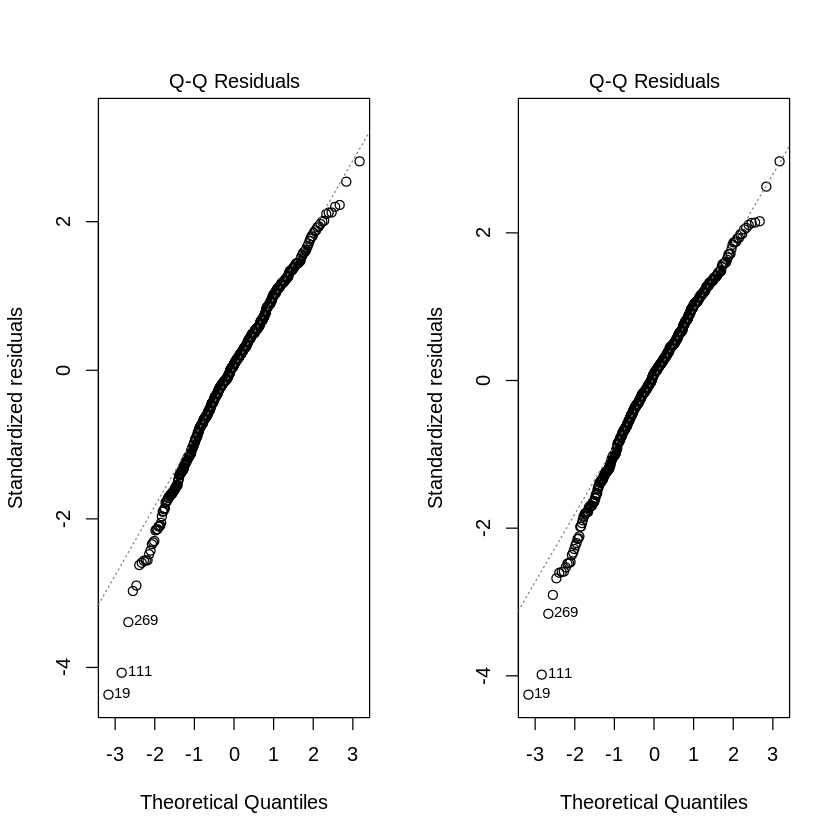

In [ ]:
par(mfrow=c(1,2))
plot(example_2.15, which=2)
plot(example_3.13b, which=2)

We can also compare AIC values.

In [ ]:
AIC(example_2.15)
AIC(example_3.13b)

[1] -658.6037

[1] -657.17

We get the same message all the way through: the two models are basically identical.  Maybe this is because we use so many predictor variables, all but one common between the models.

What if we only regress on `Ht` or `log(Ht)`?

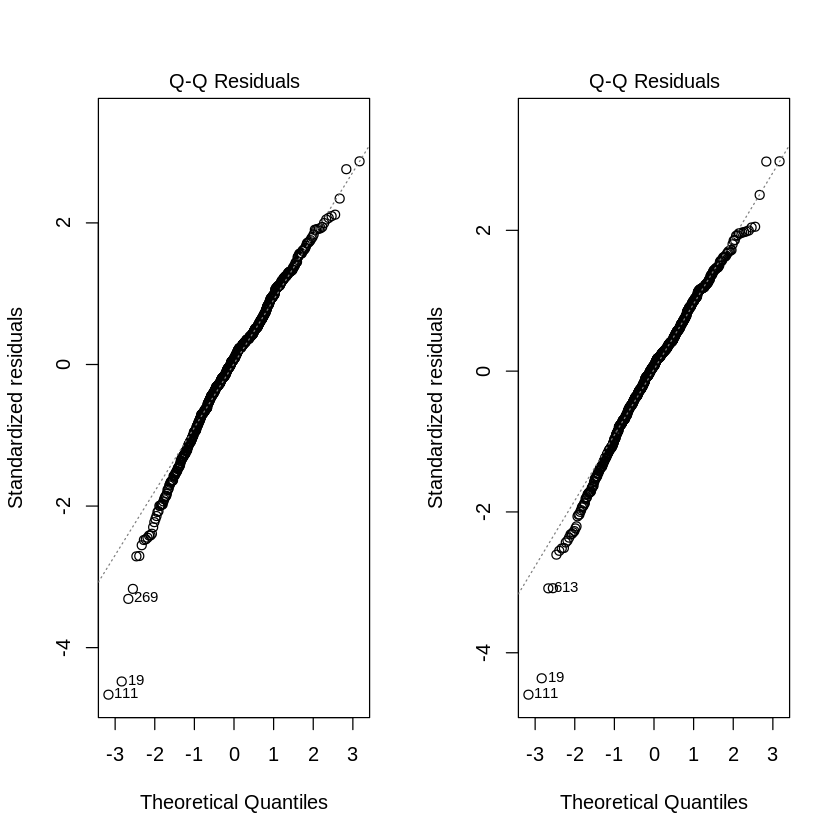

In [ ]:
m_ht <- lm(log(FEV) ~ Ht, data=d)
m_logHt <- lm(log(FEV) ~ log(Ht), data=d)

par(mfrow=c(1,2))
plot(m_ht, which=2)
plot(m_logHt, which=2)

Now I see *some* difference between the models, with `log(Ht)` seeming to fit the data better.

In [ ]:
AIC(m_ht)
AIC(m_logHt)

[1] -614.645

[1] -611.0008

The `log(Ht)` model may be a little better, but the two models are still doing pretty similarly.

## Question 3.10

In Sect. 3.15.2 (p. 141), a model is fitted to the cheese tasting data (data set: `cheese`). However, before fitting this model, the plot of `Taste` against `log(H2S)` suggested slightly non-constant variance. An alternative model might suggest using `log(Taste)` as the response rather than `Taste`. Show that using `log(Taste)` as the response results in a poor model.

### Answer to 3.10

Let's first load the data, recreate the original plot, and then adjust the plot for `log(Taste)`

In [ ]:
install.packages("GLMsData")
library(GLMsData)
data(cheese)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



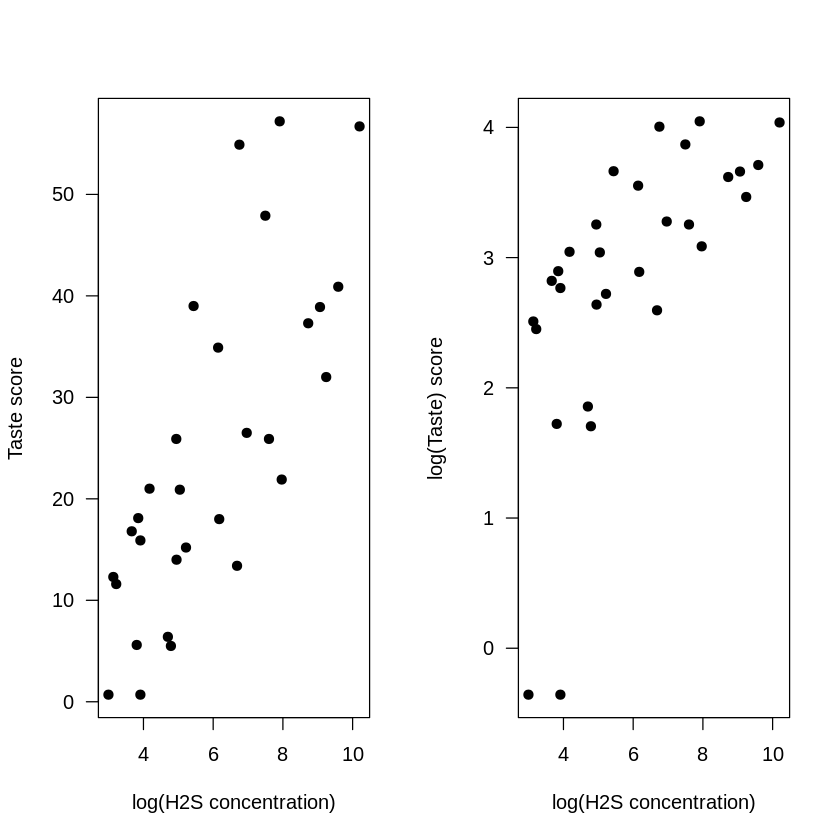

In [ ]:
par(mfrow=c(1,2))
plot(Taste ~ log(H2S), data=cheese, las=1, pch=19, xlab="log(H2S concentration)", ylab="Taste score")
plot(log(Taste) ~ log(H2S), data=cheese, las=1, pch=19, xlab="log(H2S concentration)", ylab="log(Taste) score")

Now let's get the models up.

In [ ]:
cheese.m1 <- lm(Taste ~ Acetic * log(H2S) * Lactic, data=cheese)
cheese.m1_ln <- lm(log(Taste) ~ Acetic * log(H2S) * Lactic, data=cheese)

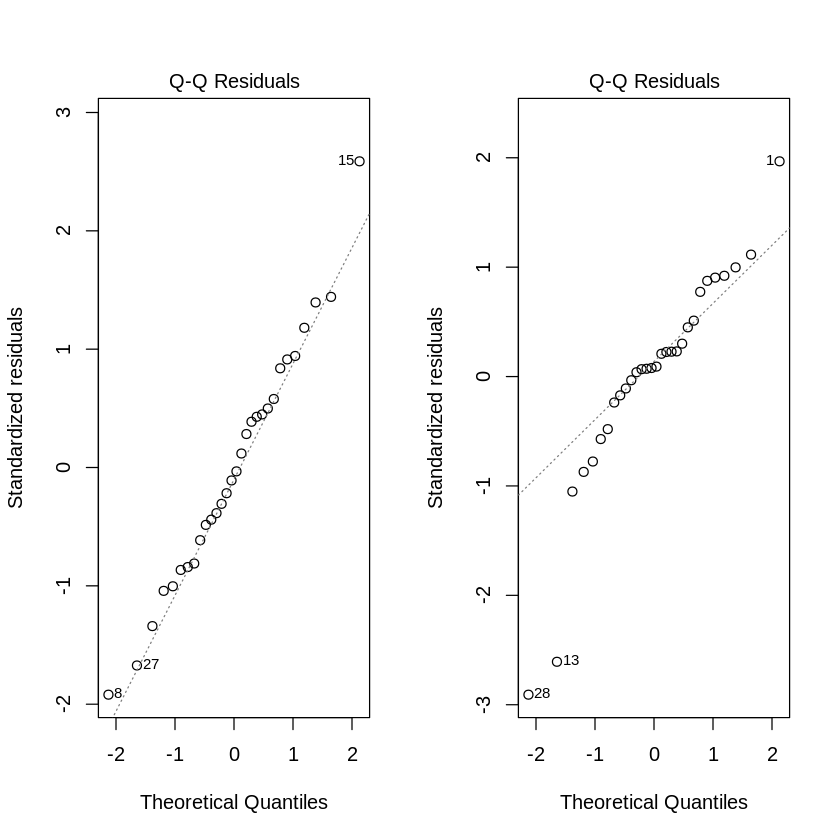

In [ ]:
par(mfrow=c(1,2))
plot(cheese.m1, which=2)
plot(cheese.m1_ln, which=2)